### Полина Кудрявцева, БКЛ182 (лингвист)

* Здесь добавляются необходимые для задания библиотеки.

In [1]:
import re
import json
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
import random
from bs4 import BeautifulSoup
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import word2vec
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

from pymystem3 import Mystem
m = Mystem()

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

* Здесь читается файл и проводится лемматизация текста.

In [2]:
with open('A Moveable Feast.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [3]:
lemmas = m.lemmatize(text)

* Каждое предложение пишется на отдельной строчке (с помощью replace).
* Из текста убирается пунктуация.
* Текст приводится к нижнему регистру.
* Результат записывается в новый файл.

In [4]:
lemmatized_text = str(lemmas)

spl_lem_text = lemmatized_text.replace('.', '\n')

low_s_l_text = spl_lem_text.lower()

cleaned_s_l_text = ''.join(x for x in low_s_l_text if x not in punctuation)

cleaned_text = re.sub('[a-zA-Z0-9]', '', cleaned_s_l_text)

In [5]:
with open('A Moveable Feast_for_word2vec.txt', 'w', encoding='utf-8') as file:
    file.write(str(cleaned_text))

* На вход модели идет получившийся файл.
* Модель инициализируется по параметрам из задания: размер вектора 300, минимальное количество вхождений 5, окно 5, количество итераций 50.
* Подсчитывается время обучения модели и количество слов в ней.

In [6]:
file = 'A Moveable Feast_for_word2vec.txt'
data = gensim.models.word2vec.LineSentence(file)

In [7]:
%time model = gensim.models.Word2Vec(data, size=300, window=5, min_count=5, iter=50)

print('\n', 'В этой модели', len(model.wv.vocab), 'слов.')

CPU times: user 4.65 s, sys: 109 ms, total: 4.76 s
Wall time: 2.7 s

 В этой модели 1055 слов.


## три ближайших слова для животных

* Рассматривается список из рандомных названий животных.
* Проверяется наличие каждого элемента списка в модели.
* Для тех слов, которые были найдены в тексте, происходит поиск пяти ближайших слов.

In [8]:
animals = ['кошка', 'мышь', 'собака', 'кот', 'бабочка']

for animal in animals:
    if animal in model:
        print('Ближайшие пять слов для слова "%s":' % animal)
        for i, j in model.wv.most_similar(animal, topn=5):
            print(i)
        print('\n')
    else:
        print('Слова "%s": нет в модели.' % animal)
        print('\n')

Ближайшие пять слов для слова "кошка":
честный
приглашение
творчество
критика
беседа


Слова "мышь": нет в модели.


Ближайшие пять слов для слова "собака":
греческий
храм
чистый
цыпленок
киса


Ближайшие пять слов для слова "кот":
напротив
толстый
палец
ложиться
консьержка


Слова "бабочка": нет в модели.




* Интересно, что для слов "кошка" и "кот" ближайшие слова совсем разные.

## три ближайших слова для профессий

* Рассматривается список из рандомных названий профессий.
* Проверяется наличие каждого элемента списка в модели.
* Для тех слов, которые были найдены в тексте, происходит поиск пяти ближайших слов.

In [9]:
abstract_things = ['врач', 'писатель', 'художник', 'машинист', 'официант']

for thing in abstract_things:
    if thing in model:
        print('Ближайшие пять слов для слова "%s":' % thing)
        for i, j in model.wv.most_similar(thing, topn=5):
            print(i, '-', j)
        print('\n')
    else:
        print('Cлова "%s": нет в модели.' % thing)
        print('\n')

Ближайшие пять слов для слова "врач":
достоевский - 0.9342045783996582
право - 0.9135309457778931
интересный - 0.9076125621795654
помоему - 0.9075435400009155
убеждать - 0.9011590480804443


Ближайшие пять слов для слова "писатель":
художник - 0.9021217823028564
известный - 0.8805851936340332
вещь - 0.8586394190788269
более - 0.8236606121063232
всякий - 0.8127783536911011


Ближайшие пять слов для слова "художник":
известный - 0.9070825576782227
писатель - 0.9021217823028564
создавать - 0.8857488632202148
серьезный - 0.8447312116622925
некоторый - 0.8443381190299988


Cлова "машинист": нет в модели.


Ближайшие пять слов для слова "официант":
коридорный - 0.9331557154655457
лимонный - 0.919241189956665
сок - 0.8992825746536255
приносить - 0.891508936882019
виски - 0.8860880732536316




* Интересно, что у "писателя" и "художника" похожие ближайшие слова. Творческие профессии!
* У "официанта" очень ожидаемые ближайшие слова. Видимо, чаще всего герои Хэмингуэя и сам писатель заказывали выпить:)

## пять ближайших слов для прилагательных "хороший" и "плохой"

In [10]:
print('Ближайшие пять слов для прилагательного "хороший":')
for i, j in model.wv.most_similar('хороший', topn=5):
    print(i, '-', j)

Ближайшие пять слов для прилагательного "хороший":
вещь - 0.777630090713501
создавать - 0.7427278757095337
писатель - 0.7421299815177917
известный - 0.7282617092132568
очень - 0.7201681137084961


In [11]:
print('Ближайшие пять слов для прилагательного "плохой":')
for i, j in model.wv.most_similar('плохой', topn=5):
    print(i, '-', j)

Ближайшие пять слов для прилагательного "плохой":
важный - 0.8500424027442932
интересно - 0.8444178700447083
творчество - 0.8359591960906982
необходимо - 0.8335371613502502
точно - 0.8296539783477783


* Интересно, что одно из ближайших слов для прилагательного "хороший" - "поэт" и "художник". При этом для прилагательного "плохой" ближайшим является слово "творчество", что удивительно.

## семантическая пропорция

In [12]:
print(model.wv.most_similar(positive=['художник', 'книга'], negative=['картина'], topn=1))

[('рассказ', 0.8180609941482544)]


* Я думала, получится писатель.. Вероятно, модель слишком маленькая.
* При пересоздании модели иногда выдает "читать" - такой вариант тоже выглядит нормально.

## лишнее в списке

* Проверяется наличие каждого из элементов рандомного списка в тексте.
* Затем в этом списке происходит поиск лишнего элемента.

In [13]:
words = ['жизнь', 'любовь', 'счастье', 'дружба', 'симпатия', 'спокойствие', 'смерть']

words_from_model = []

for word in words:
    if word in model:
        words_from_model.append(word)

print('Лишнее слово среди в этом списке:', words_from_model, '-', model.doesnt_match(words_from_model))

Лишнее слово среди в этом списке: ['жизнь', 'любовь', 'смерть'] - жизнь


* Здесь по разным моделям бывает лишним и "жизнь", и "смерть". Хэмингуэй..

## визуализация PCA на именах героев

* В книге упоминаются известные литераторы.
* "Скотт" и "Фицджеральд" - это один и тот же человек.

In [14]:
names = ['достоевский', 'скотт', 'фицджеральд', 'джойс', 'эрнест']
X = model[names]

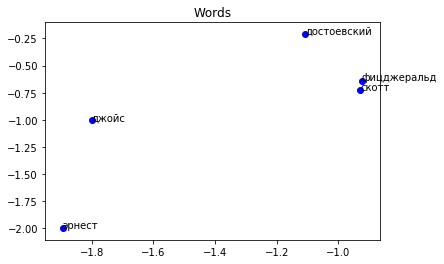

In [15]:
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[names])

plt.scatter(coords[:, 0], coords[:, 1], color='blue')
plt.title('Words')

for i, name in enumerate(names):
    plt.annotate(name, xy=(coords[i, 0], coords[i, 1]))
plt.show()

* Все правильно, "фицджеральд" и "скотт" - один и тот же человек, и точки находятся рядом.
* А Эрнест - Хэмингуэй - тут главный, в стороне.. но книга ведется от его лица, это определенно повлияло на визуализацию.